In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
import pandas as pd

In [4]:
from matplotlib import pyplot as plt

In [5]:
from tensorflow.keras.models import Sequential

In [73]:
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import pad_sequences

In [7]:
### Gerador da Próxima Palavra

In [11]:
df = pd.read_csv("./medium_data.csv")
df = df[["id", "title"]]
df

,id,title
0,1,A Beginner’s Guide to Word Embedding with Gens...
1,2,Hands-on Graph Neural Networks with PyTorch & ...
2,3,How to Use ggplot2 in Python
3,4,Databricks: How to Save Files in CSV on Your L...
4,5,A Step-by-Step Implementation of Gradient Desc...
...,...,...
6503,6504,“We” vs “I” — How Should You Talk About Yourse...
6504,6505,How Donald Trump Markets Himself
6505,6506,Content and Marketing Beyond Mass Consumption
6506,6507,5 Questions All Copywriters Should Ask Clients...


In [31]:
textos = df["title"].str.replace("\xa0", " ").str.replace("\u200a", "")
textos

,title
0,A Beginner’s Guide to Word Embedding with Gens...
1,Hands-on Graph Neural Networks with PyTorch & ...
2,How to Use ggplot2 in Python
3,Databricks: How to Save Files in CSV on Your L...
4,A Step-by-Step Implementation of Gradient Desc...
...,...
6503,“We” vs “I”—How Should You Talk About Yourself...
6504,How Donald Trump Markets Himself
6505,Content and Marketing Beyond Mass Consumption
6506,5 Questions All Copywriters Should Ask Clients...


In [23]:
tokenizer = Tokenizer()

In [32]:
tokenizer.fit_on_texts( textos )

In [38]:
vocab = tokenizer.word_index
vocab

{'to': 1,
 'the': 2,
 'strong': 3,
 'a': 4,
 'of': 5,
 'how': 6,
 'and': 7,
 'in': 8,
 'your': 9,
 'markup': 10,
 'for': 11,
 'you': 12,
 'with': 13,
 'is': 14,
 'data': 15,
 'class': 16,
 'why': 17,
 'h3': 18,
 'i': 19,
 'what': 20,
 'on': 21,
 'learning': 22,
 'from': 23,
 'an': 24,
 'be': 25,
 'my': 26,
 'writing': 27,
 'are': 28,
 'it': 29,
 'can': 30,
 'using': 31,
 'ux': 32,
 'design': 33,
 'machine': 34,
 'about': 35,
 'do': 36,
 'not': 37,
 'python': 38,
 'ai': 39,
 'life': 40,
 'that': 41,
 'when': 42,
 'should': 43,
 'we': 44,
 '5': 45,
 'science': 46,
 'make': 47,
 'need': 48,
 'time': 49,
 'as': 50,
 'more': 51,
 'at': 52,
 '3': 53,
 'business': 54,
 'or': 55,
 'have': 56,
 'work': 57,
 'new': 58,
 'don’t': 59,
 'by': 60,
 'up': 61,
 'write': 62,
 'get': 63,
 'guide': 64,
 'use': 65,
 'will': 66,
 'marketing': 67,
 'ways': 68,
 'deep': 69,
 'part': 70,
 'best': 71,
 '1': 72,
 'first': 73,
 'better': 74,
 '2019': 75,
 'product': 76,
 'analysis': 77,
 'neural': 78,
 'know': 7

In [34]:
textos[0]

'A Beginner’s Guide to Word Embedding with Gensim Word2Vec Model'

In [35]:
tokenizer.texts_to_sequences( [textos[0]] )

[[4, 664, 64, 1, 447, 1492, 13, 2426, 3609, 97]]

In [42]:
tokenizer.texts_to_sequences( [textos[1]] )

[[1827, 21, 728, 78, 100, 13, 336, 336, 1828]]

In [36]:
sequences = tokenizer.texts_to_sequences( textos )

In [60]:
lista_sequencias = []
lista_classes = []
maior = 0
for tokens in sequences: # [ [75, 8, 3, 4, 6, 2], [1, 5, 8], [123, 345, 46, 675]....]
  tamanho = len(tokens) # 6
  if tamanho > maior:
    maior = tamanho
  for i in range(2, tamanho):
    lista_sequencias.append( tokens[0: i]  )
    lista_classes.append(tokens[i])
lista_sequencias



[[4, 664],
 [4, 664, 64],
 [4, 664, 64, 1],
 [4, 664, 64, 1, 447],
 [4, 664, 64, 1, 447, 1492],
 [4, 664, 64, 1, 447, 1492, 13],
 [4, 664, 64, 1, 447, 1492, 13, 2426],
 [4, 664, 64, 1, 447, 1492, 13, 2426, 3609],
 [1827, 21],
 [1827, 21, 728],
 [1827, 21, 728, 78],
 [1827, 21, 728, 78, 100],
 [1827, 21, 728, 78, 100, 13],
 [1827, 21, 728, 78, 100, 13, 336],
 [1827, 21, 728, 78, 100, 13, 336, 336],
 [6, 1],
 [6, 1, 65],
 [6, 1, 65, 3610],
 [6, 1, 65, 3610, 8],
 [3611, 6],
 [3611, 6, 1],
 [3611, 6, 1, 261],
 [3611, 6, 1, 261, 1270],
 [3611, 6, 1, 261, 1270, 8],
 [3611, 6, 1, 261, 1270, 8, 2427],
 [3611, 6, 1, 261, 1270, 8, 2427, 21],
 [3611, 6, 1, 261, 1270, 8, 2427, 21, 9],
 [3611, 6, 1, 261, 1270, 8, 2427, 21, 9, 917],
 [4, 189],
 [4, 189, 60],
 [4, 189, 60, 189],
 [4, 189, 60, 189, 473],
 [4, 189, 60, 189, 473, 5],
 [4, 189, 60, 189, 473, 5, 1829],
 [4, 189, 60, 189, 473, 5, 1829, 1493],
 [4, 189, 60, 189, 473, 5, 1829, 1493, 7],
 [24, 192],
 [24, 192, 124],
 [24, 192, 124, 1],
 [24, 

In [61]:
lista_classes

[64,
 1,
 447,
 1492,
 13,
 2426,
 3609,
 97,
 728,
 78,
 100,
 13,
 336,
 336,
 1828,
 65,
 3610,
 8,
 38,
 1,
 261,
 1270,
 8,
 2427,
 21,
 9,
 917,
 217,
 60,
 189,
 473,
 5,
 1829,
 1493,
 7,
 1494,
 124,
 1,
 415,
 11,
 15,
 321,
 3612,
 3613,
 811,
 2428,
 729,
 305,
 1830,
 14,
 2,
 71,
 52,
 400,
 39,
 97,
 169,
 918,
 192,
 10,
 103,
 10,
 18,
 103,
 20,
 19,
 101,
 23,
 281,
 49,
 812,
 3614,
 3615,
 3616,
 103,
 3617,
 607,
 31,
 262,
 3618,
 1831,
 3619,
 551,
 172,
 11,
 200,
 201,
 665,
 2430,
 552,
 3620,
 11,
 15,
 2431,
 53,
 2433,
 2434,
 7,
 4,
 2433,
 729,
 379,
 323,
 11,
 814,
 1832,
 815,
 76,
 666,
 28,
 3623,
 2,
 553,
 6,
 34,
 22,
 30,
 153,
 1,
 1496,
 211,
 2435,
 919,
 3624,
 5,
 3625,
 3626,
 271,
 3627,
 7,
 271,
 3628,
 10,
 3,
 10,
 18,
 3,
 6,
 15,
 337,
 816,
 1835,
 4,
 290,
 473,
 5,
 817,
 200,
 920,
 3,
 10,
 3,
 10,
 18,
 3,
 1066,
 21,
 667,
 55,
 667,
 21,
 1066,
 2,
 2436,
 7,
 1836,
 5,
 730,
 1497,
 3,
 120,
 173,
 4,
 45,
 189,
 136,
 33,


In [62]:
maior

38

In [70]:
X = pad_sequences(lista_sequencias)
X.shape

(41099, 37)

In [69]:
Y = to_categorical(lista_classes)

In [71]:
Y.shape

(41099, 8539)

In [72]:
len(vocab)

8538

In [74]:
modelo = Sequential()
modelo.add(Embedding(input_dim=Y.shape[1], output_dim=16))
modelo.add(Bidirectional(LSTM(64)))
modelo.add(Dense(Y.shape[1], activation="softmax"))
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [77]:
adam = Adam(learning_rate = 0.01)
modelo.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["Accuracy"])

In [78]:
hist = modelo.fit(X, Y, epochs=20, batch_size=32)

Epoch 1/20
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 88s 65ms/step - Accuracy: 0.1017 - loss: 6.8853
Epoch 2/20
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - Accuracy: 0.1512 - loss: 5.9502
Epoch 3/20
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 85s 66ms/step - Accuracy: 0.1908 - loss: 5.1624
Epoch 4/20
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 144s 68ms/step - Accuracy: 0.2190 - loss: 4.4674
Epoch 5/20
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 145s 70ms/step - Accuracy: 0.2725 - loss: 3.8346
Epoch 6/20
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 136s 66ms/step - Accuracy: 0.3303 - loss: 3.3518
Epoch 7/20
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 85s 66ms/step - Accuracy: 0.3850 - loss: 2.9881
Epoch 8/20
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 142s 66ms/step - Accuracy: 0.4238 - loss: 2.7501
Epoch 9/20
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 143s 67ms/step - Accuracy: 0.4573 - loss: 2.5480
Epoch 10/20
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 86s 67ms/step - Accuracy: 0.4797 - loss: 2.4114
Epoch 11/20
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 140s 65ms/step - Accuracy: 0.4957 - loss: 2.3005
Ep

In [116]:
hist.history

{'Accuracy': [0.11258181184530258,
  0.1540183424949646,
  0.18516266345977783,
  0.2129005640745163,
  0.2531205117702484,
  0.3023187816143036,
  0.352441668510437,
  0.39052045345306396,
  0.42020487785339355,
  0.44215187430381775,
  0.4598408639431,
  0.47529137134552,
  0.48641085624694824,
  0.4961921274662018,
  0.5059733986854553,
  0.5102313756942749,
  0.519477367401123,
  0.5242949724197388,
  0.5265578031539917,
  0.5397211313247681],
 'loss': [6.832663059234619,
  5.9737772941589355,
  5.286376476287842,
  4.612448215484619,
  4.025224685668945,
  3.561919927597046,
  3.2013587951660156,
  2.9444756507873535,
  2.755767583847046,
  2.616483688354492,
  2.4969334602355957,
  2.404179811477661,
  2.328052282333374,
  2.2666497230529785,
  2.213921546936035,
  2.1765966415405273,
  2.126925230026245,
  2.091952085494995,
  2.0791940689086914,
  2.023893356323242]}

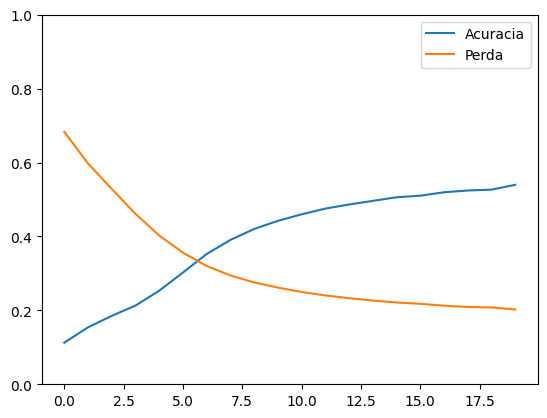

In [120]:
perda = np.array(hist.history['loss'])/10
plt.plot(hist.history['Accuracy'], label="Acuracia")
plt.plot(perda, label="Perda")
plt.ylim(0, 1)
plt.legend()
plt.show()

In [123]:
old_modelo = modelo

In [79]:
frase = "artificial inteligence is a "

In [80]:
tokens = tokenizer.texts_to_sequences( [frase] )
tokens

[[106, 14, 4]]

In [109]:
tokens_padded = pad_sequences(tokens, maxlen=37, padding='pre')
tokens_padded

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 106,  14,   4]],
      dtype=int32)

In [110]:
Y_hat = modelo.predict(tokens_padded)
Y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[9.3076452e-10, 1.6971446e-04, 8.6701097e-05, ..., 3.2161863e-11,
        9.9222800e-12, 1.3732589e-06]], dtype=float32)

In [111]:
indice_palavra = np.argmax(Y_hat)
indice_palavra

2638

In [87]:
palavra = tokenizer.sequences_to_texts( [ [indice_palavra] ] )
palavra

['brutal']

In [113]:
def completar_texto( texto, quantas_palavras=1 ):
  texto_final = ""
  for i in range(quantas_palavras):
    # print(texto)
    tokens = tokenizer.texts_to_sequences( [texto] )
    tokens_padded = pad_sequences(tokens, maxlen=37, padding='pre')
    Y_hat = modelo.predict(tokens_padded, verbose=0)
    indice_palavra = np.argmax(Y_hat)
    palavra = tokenizer.sequences_to_texts( [ [indice_palavra] ] )[0]
    texto_final = texto + " " + palavra
    texto = texto_final
  return texto_final

In [115]:
completar_texto("the future", 8)

'the future of the walking ad like a touring musician'